In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pickle
import graph
import csv

In [18]:
def initiation(x):
    return np.random.randn(x.shape[1],1)

In [19]:
def modele(x, theta):
    return x.dot(theta)


In [20]:
def function_cost(x, y, theta):
    m = len(y)
    return 1/(2*m)*(np.sum(modele(x, theta) -  y)**2)


In [21]:
def gradient(x, y, theta):
    m = len(y)
    return (1/m) *  x.T.dot(modele(x, theta) - y)

In [22]:
def gradient_Desc(x, y, nbr_iterations, learning_rate, goal):
    cost_History = np.zeros(nbr_iterations)
    rmse = np.zeros(nbr_iterations)
    theta =  initiation(x)
    for i in range(0, nbr_iterations):
        theta = theta - learning_rate * gradient(x, y, theta)
        cost_History[i] = function_cost(x, y, theta)
        y_pred = prediction(x, theta)
        rmse[i] = RMSE(y, y_pred)

        if((1 - rmse[i]) >= goal):
            break
    
    return theta, cost_History, rmse

In [23]:
def prediction(x, theta):
    return modele(x, theta)

In [24]:
def RMSE(y_rel, y_pred):
    u = ((y_rel - y_pred)**2).sum()
    v = ((y_rel - y_rel.mean())**2).sum()

    return u/v


In [25]:
def save_model(theta):
    with open('./datasets/modele.data', 'wb') as file:
        myPickel = pickle.Pickler(file)
        myPickel.dump(theta)
    
    file.close()

In [26]:
def load_modele():
    with open('./datasets/modele.data', 'rb') as file:
        myPickel = pickle.Unpickler(file)
        theta = myPickel.load()
    file.close()
    
    return theta

In [ ]:
def train(x, y, nbr_iterations = 1000, learning_rate = 0.01, goal = 0.98, save_modele = False, visual_result =  False):

    #while(True):
    theta, cost_History, rmse = gradient_Desc(x, y, nbr_iterations, learning_rate, goal)
    y_predite = prediction(x, theta)
    a = 1 - RMSE( y, y_predite)
    print('Cost: ',cost_History.shape)
    print('RMSE: ',rmse.shape)
    print("Performance: ",a)
    """if( a>= goal):
        print("Meilleur Performance: ",a)
        #break"""
    
    if(save_modele):
        save_model(theta)
    
    if(visual_result):
        myGraph = graph.graphic((7,7))
        print("length v1: ", x[:, 0].shape)
        print("Tetha: ", tetha)
        print("length pred: ", y_predite.shape)
        myGraph.graph2D(x, y, y_predite)
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(cost_History, label = 'Cost function')
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(rmse, label = 'Error RMSE', color ='red')
        plt.legend()
        plt.show()
        #myGraph.graphRMSE(rmse)
    #return cost_History

In [27]:
def extraire():
    file =  open("./datasets/LengthOfStay.csv", "r")

    resultcsv = csv.reader(file, delimiter = ",")
    i = 0
    data = dict()

    for row in resultcsv:
        data[i] = row
        i = i + 1
    
    file.close()
    return data

In [28]:
def numpyOfdict(input, length):

    input = dict(list(input.items())[:length])
    rec = list(input.items())
    data = np.array(rec)
    X = np.array(data[0][1])
    for i in range(data.shape[0]):
        if( i >0): 
            X = np.vstack((X, data[i][1]))

    return X

In [29]:
#[0,1,2,3,26,27]
def purge(data, indesirable):
    data = data[1:, :]
    y = data[:, 27]
    x = np.delete(data, indesirable, axis=1)
    return (x, y)

In [30]:
data = extraire()

data = numpyOfdict(data, 50)
x, y = purge(data,[0,1,2,3,26,27]) 
print("X: ",x.shape)
print("Y: ", y.shape)
y

X:  (49, 22)
Y:  (49,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_5744\3717415635.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(rec)


array(['3', '7', '3', '1', '4', '6', '6', '3', '3', '2', '1', '7', '3',
       '5', '2', '4', '6', '1', '5', '2', '3', '1', '6', '4', '6', '4',
       '7', '5', '6', '2', '4', '3', '1', '5', '4', '3', '2', '10', '8',
       '4', '7', '1', '5', '2', '4', '9', '5', '1', '3'], dtype='<U26')

Dimension de X et Y
X:  (200, 3)
Y:  (200, 1)
Cost:  (1000,)
RMSE:  (1000,)
Performance:  0.007635877405322233
length v1:  (200,)


NameError: name 'tetha' is not defined

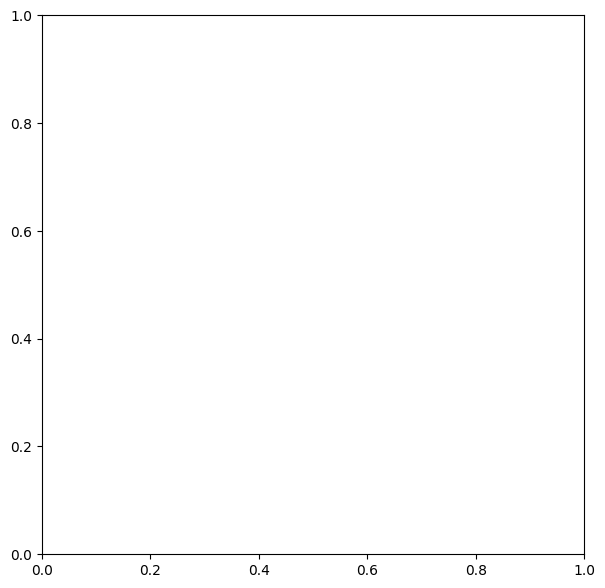

In [31]:

x, y = make_regression(n_samples=200, n_features=1, noise=10)

x, y = make_regression(n_samples=200, n_features=1, noise=10)

x = np.hstack((x**2, x))
x = np.hstack((x, np.ones((x.shape[0], 1))))
y = y.reshape(y.shape[0], 1)
y = y - abs(y/2)

print("Dimension de X et Y")
print("X: ",x.shape)
print("Y: ",y.shape)

train(x, y, save_modele=True, visual_result=True)

